### Tugas Kelompok 3 - Market Basket Analysis


---
Anggota Kelompok:
*   2440103546 - Mahatmaditya Favian Rachman Syarief
*   2440099946 - Muh. Rizal Sakti Djatmieka
*   2440100683 - Gede Dyava Savitra
*   2440103911 - Ramadhani Al Amin
*   2440071733 - Bachatsa Taqiyya








### import libraries & Dataset



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install apyori # Installing apriori library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Reading dataset and Converting "Date" column to date format
df = pd.read_csv('/content/Groceries_dataset.csv', parse_dates = ['Date'])

In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [ ]:
df.tail()

,Member_number,Date,itemDescription
38760,4471,2014-08-10,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-03-12,fruit/vegetable juice
38764,1521,2014-12-26,cat food


In [ ]:
# check NaN Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [ ]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


### Check null values & drop null values

In [ ]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
df.dropna()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk
...,...,...,...
38760,4471,2014-08-10,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-03-12,fruit/vegetable juice


### Calculating number of transactions 
the table illustrate that customer number 1000 bought 3 items in 2014-06-24

In [ ]:
transactions = df.groupby(['Member_number', 'Date'])
transactions.count()

itemDescription
Member_number Date                       
1000          2014-06-24                3
              2015-03-15                4
              2015-05-27                2
              2015-07-24                2
              2015-11-25                2
...                                   ...
4999          2015-05-16                2
              2015-12-26                2
5000          2014-09-03                2
              2014-11-16                2
              2015-10-02                3

[14963 rows x 1 columns]

###Calculating support of each item


In [ ]:
support = (df['itemDescription'].value_counts()/14963*100)
support.head()

whole milk          16.721246
other vegetables    12.684622
rolls/buns          11.468288
soda                10.118292
yogurt               8.915324
Name: itemDescription, dtype: float64

### Plotting support of Top 10 Items

In [ ]:
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.6.2


In [ ]:
# update
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


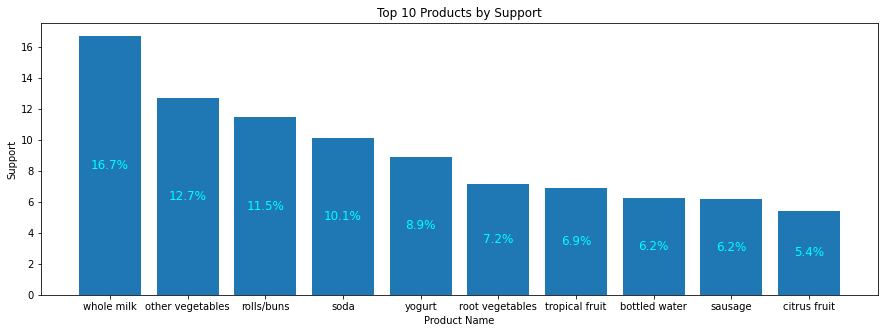

In [ ]:

plt.figure(figsize = (15,5))
bars = plt.bar(x = np.arange(len(support.head(10))), height = (support).head(10))
plt.bar_label(bars, fontsize=12, color='cyan', fmt = '%2.1f%%', label_type = 'center')
plt.xticks(ticks = np.arange(len(support.head(10))), labels = support.index[:10])

plt.title('Top 10 Products by Support')
plt.ylabel('Support')
plt.xlabel('Product Name')
plt.show()

## Implementing Apriori Library

In [ ]:
# Importing Apriori Algorithm
from apyori import apriori

In [ ]:
# Converting Transactions to list
list_transactions = [i[1]['itemDescription'].tolist() for i in list(transactions)]
list_transactions[:10]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread']]

#### Defining Association Rules

In [ ]:
rules = apriori(list_transactions, min_support = 0.001, min_confidence = 0.05, min_lift = 1.2, max_length = 2)
results = list(rules)

### Creating new data frame of rules and Calculating number of rules

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
final_df = pd.DataFrame(columns = ['Left Hand Side', 'Right Hand Side', 'Support(%)', 'Confidence(%)', 'Lift'])
for i in results:
    if len(i[0]) > 1:
        for j in range(0, len(i[2])):
            LHS = list(i[2][j][0])[0]
            RHS = list(i[2][j][1])[0]
            SUPPORT = i[1]*100
            CONFIDENCE = i[2][j][2]*100
            LIFT = i[2][j][3]
            new_row = {'Left Hand Side': LHS, 'Right Hand Side': RHS, 'Support(%)': SUPPORT, 'Confidence(%)': CONFIDENCE, 'Lift': LIFT}
            final_df = final_df.append(new_row, ignore_index = True)
final_df['Rules'] = final_df['Left Hand Side'] + ' -> ' + final_df['Right Hand Side']
print('Number of Rules: ', final_df['Rules'].count(), 'Rules')
final_df.head()

Number of Rules:  30 Rules


,Left Hand Side,Right Hand Side,Support(%),Confidence(%),Lift,Rules
0,beverages,sausage,0.15,9.27,1.54,beverages -> sausage
1,bottled beer,sausage,0.33,7.37,1.22,bottled beer -> sausage
2,sausage,bottled beer,0.33,5.54,1.22,sausage -> bottled beer
3,sugar,bottled water,0.15,8.30,1.37,sugar -> bottled water
4,brown bread,canned beer,0.24,6.39,1.36,brown bread -> canned beer
